In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.svm import SVC
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.
c:\Users\LAP\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# df = pd.read_csv('/content/drive/MyDrive/ProjectI/diabetes.csv')
# df.head()
df=pd.read_csv('diabetes.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


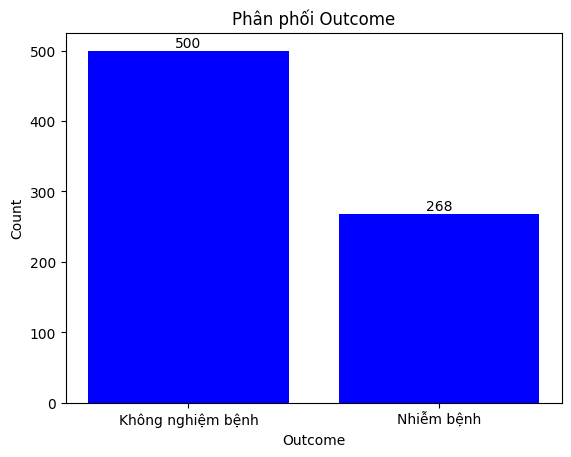

In [7]:

Nhiem_benh = df[df['Outcome'] == 1].count()['Outcome']
total_samples = len(df)
Nhiem_benh
x = [0, 1]
y = [total_samples - Nhiem_benh, Nhiem_benh]

plt.bar(x, y, color = 'blue')
plt.xticks(x, ['Không nghiệm bệnh', 'Nhiễm bệnh'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Phân phối Outcome')
for i in range(len(x)):
    plt.text(x[i], y[i] + 5, str(y[i]), ha='center')
plt.savefig("PhanphoiOutcome.png")
plt.show()


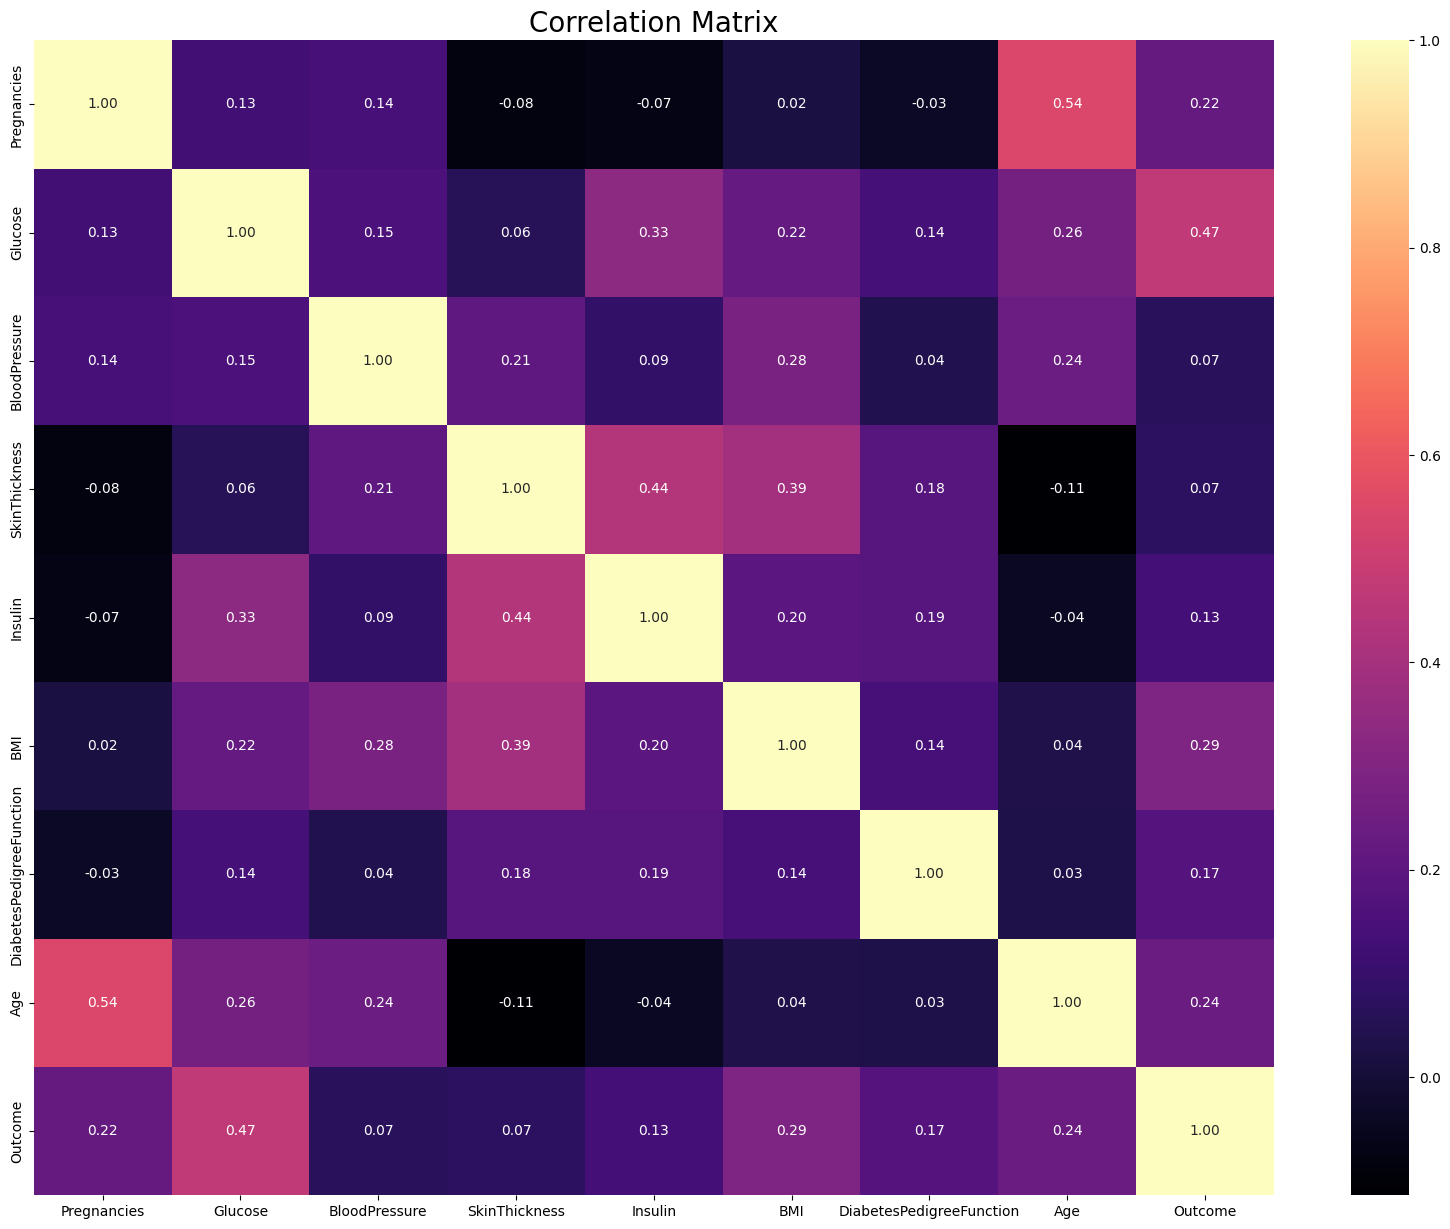

In [8]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.savefig("mttq.png")
plt.show()


Khi chưa sử dụng Loại bỏ OUTLINES

In [9]:
#trên các cột, giá trị bằng 0 không có ý nghĩa và do đó biểu thị giá trị bị thiếu.
# Do đó các dữ liệu có giá trị là 0 trên các cột Glucose,BloodPressure,SkinThickness,Insulin,BMI ta thay thế bằng các giá trị null
data_copy =   df.copy(deep =True)
data_copy [['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy [['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
data_copy.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
data_copy['Glucose'].fillna(data_copy['Glucose'].median(),inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].median(),inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(),inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(),inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(),inplace = True)

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Outcome"], axis =1),),columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
y = data_copy.Outcome
X,y

(     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
 0       0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
 1      -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
 2       1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
 3      -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
 4      -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   
 ..           ...       ...            ...            ...       ...       ...   
 763     1.827813 -0.679069       0.298896       2.150354  0.455573  0.064737   
 764    -0.547919  0.011301      -0.197433      -0.239949 -0.181541  0.632365   
 765     0.342981 -0.021574      -0.031990      -0.695245 -0.332132 -0.910418   
 766    -0.844885  0.142800      -1.024647      -0.012301 -0.181541 -0.342790   
 767    -0.844885 -0.942068      -0.197433       0.215347 -0.181541 -0.299127   
 
      DiabetesPedigreeFunc

In [13]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model=SVC(kernel='linear')
model.fit(X_train,y_train)
y_train_prediction=model.predict(X_train)
y_test_prediction =model.predict(X_test)
test_data_accuracy =accuracy_score(y_test_prediction,y_test)
train_data_accuracy = accuracy_score(y_train_prediction,y_train)
print("Độ chính xác của tập test:",test_data_accuracy*100)
print("Độ chính xác của tập train:",train_data_accuracy*100)

Độ chính xác của tập test: 75.32467532467533
Độ chính xác của tập train: 76.71009771986971


In [14]:
print(classification_report(y_test, y_test_prediction))
print(classification_report(y_train, y_train_prediction))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.71      0.55      0.62       213

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



SAU KHI SỬ LÝ OUTLINES


In [15]:
#Thay thế các giá trị 0 bằng NaN
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [16]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [17]:
#median
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
# # pair plot
# p = sns.pairplot(df, hue="Outcome")
# plt.savefig('Đồ thị biểu thị mối quan hệ giữa từng thuộc tính.png')

In [20]:
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


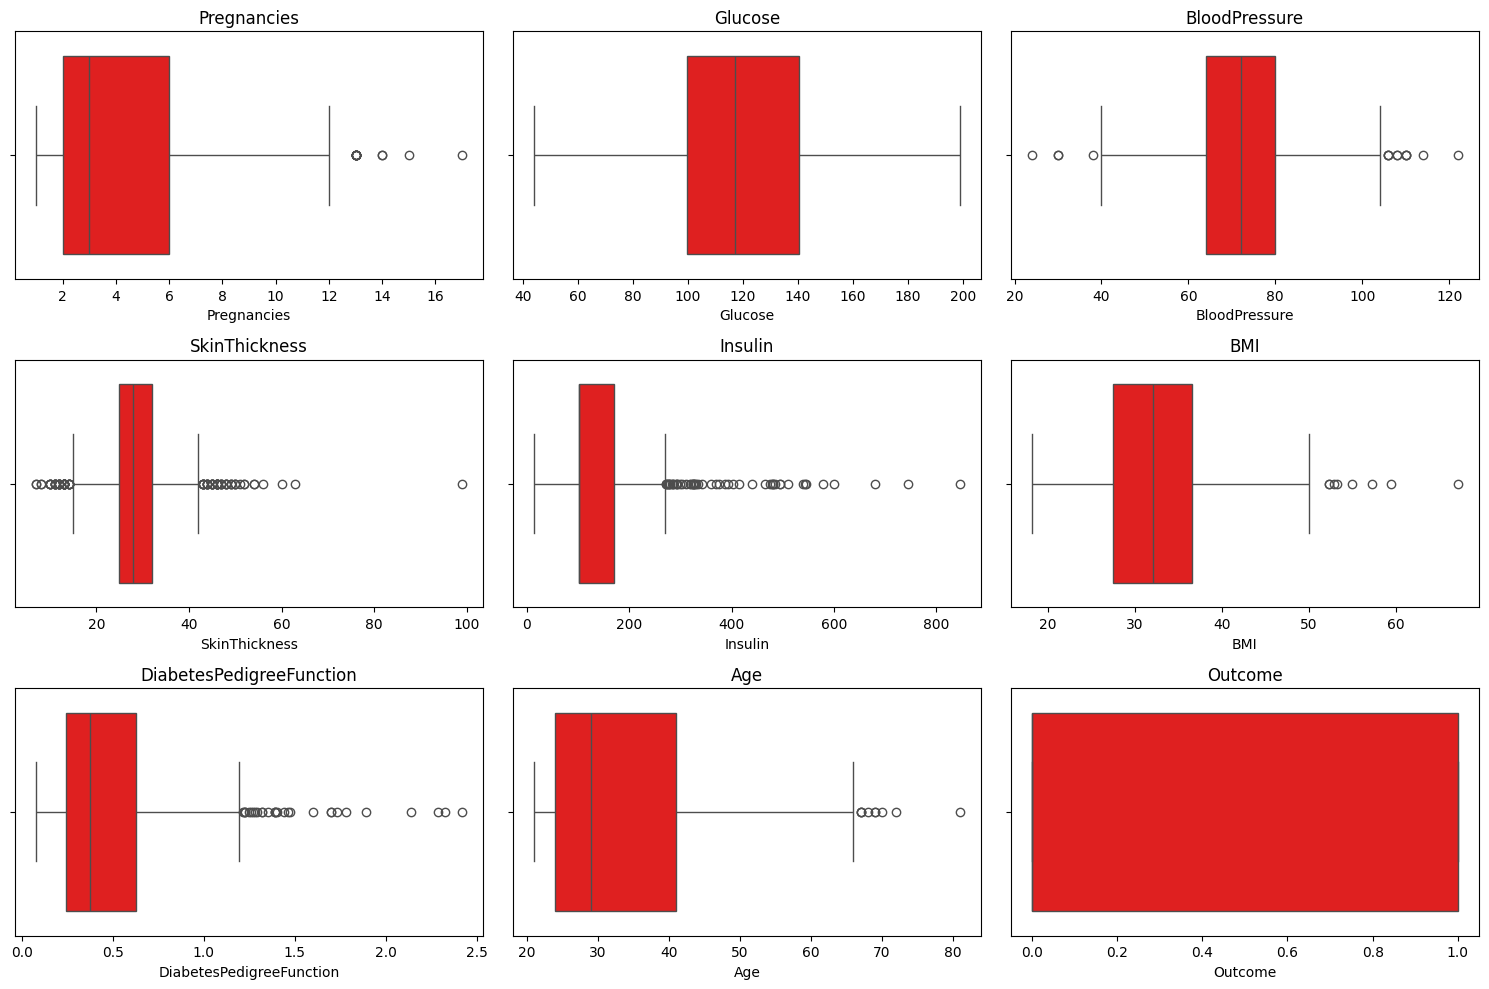

In [21]:
# Thiết lập kích thước của figure
plt.figure(figsize=(15, 10))

# Vẽ boxplot cho tất cả các cột trong DataFrame df
for column in df.columns:
    # Kiểm tra xem cột hiện tại có phải là cột dạng số không
    if df[column].dtype in ['int64', 'float64']:
        plt.subplot(3, 3, list(df.columns).index(column) + 1)  # Thiết lập vị trí của subplot
        sns.boxplot(x=df[column], color="red")  # Vẽ boxplot cho cột hiện tại
        plt.title(column)  # Đặt tiêu đề cho boxplot

plt.tight_layout()  # Tự động căn chỉnh layout
# Lưu hình ảnh trước khi hiển thị
plt.savefig('boxplot_figure.png', dpi=300)
plt.show()  # Hiển thị boxplot


In [22]:
for column in df.columns:
    # Tính toán Q1, Q3, và IQR cho từng cột
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Tính toán ngưỡng dưới và ngưỡng trên
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Thay thế các giá trị ngoại lệ bằng ngưỡng trên
    df.loc[df[column] > upper, column] = upper

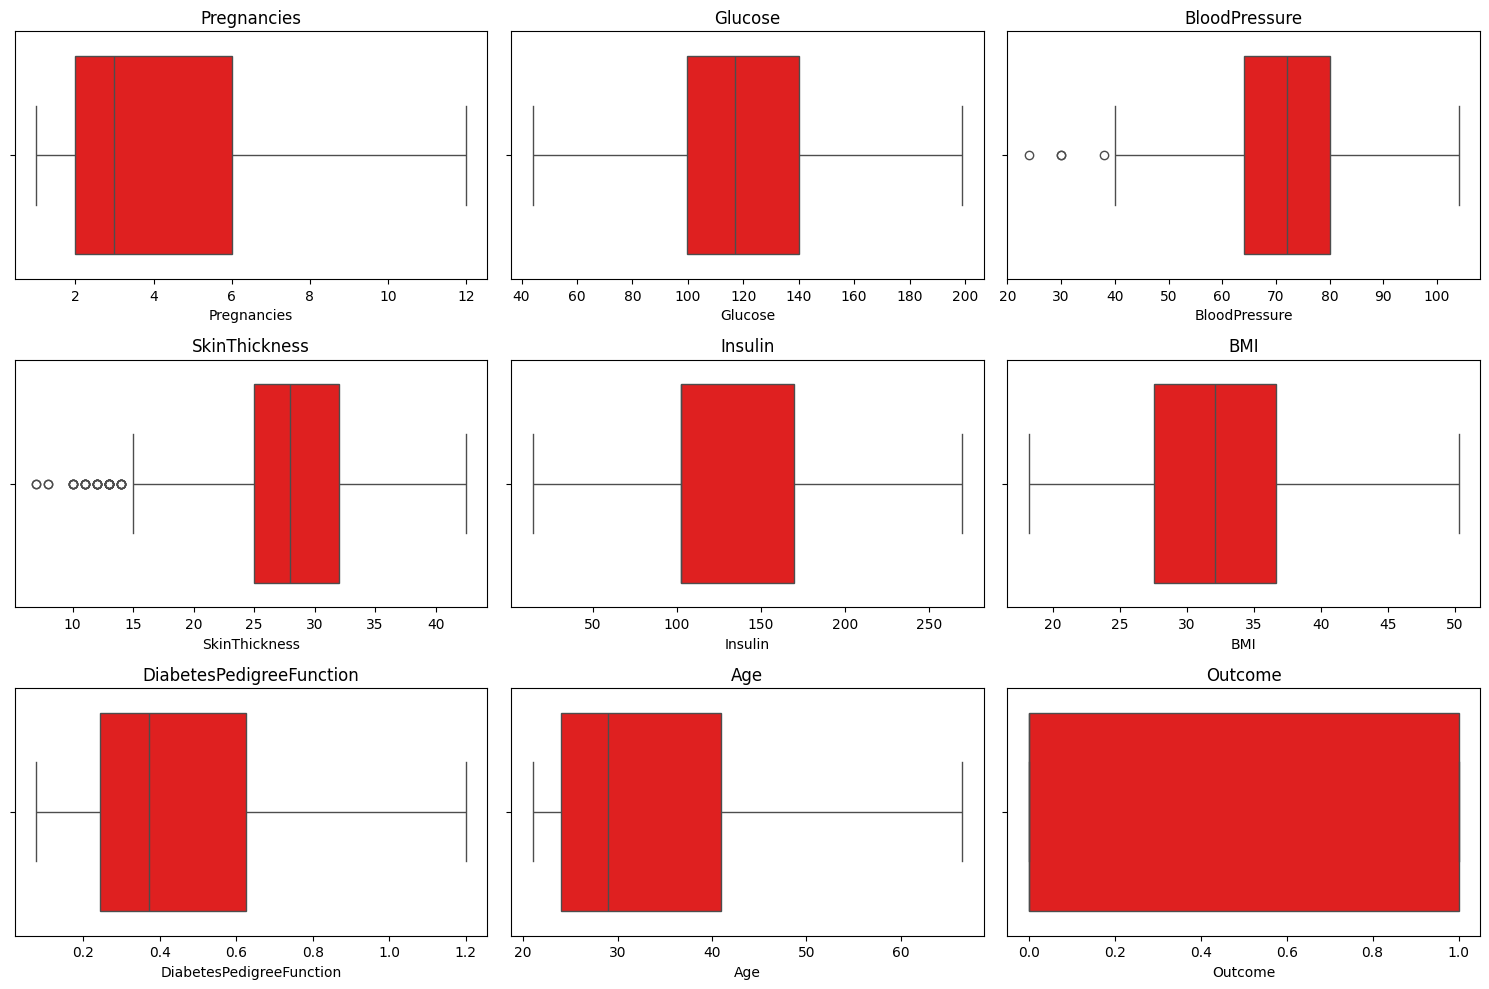

In [23]:
# Thiết lập kích thước của figure
plt.figure(figsize=(15, 10))

# Vẽ boxplot cho tất cả các cột trong DataFrame df
for column in df.columns:
    # Kiểm tra xem cột hiện tại có phải là cột dạng số không
    if df[column].dtype in ['int64', 'float64']:
        plt.subplot(3, 3, list(df.columns).index(column) + 1)  # Thiết lập vị trí của subplot
        sns.boxplot(x=df[column], color="red")  # Vẽ boxplot cho cột hiện tại
        plt.title(column)  # Đặt tiêu đề cho boxplot

plt.tight_layout()  # Tự động căn chỉnh layout
# Lưu hình ảnh trước khi hiển thị
plt.savefig('boxplot_figure_1.png', dpi=300)
plt.show()  # Hiển thị boxplot

In [24]:
y=df['Outcome']
X=df.drop(['Outcome'],axis=1)
X,y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6.0    148.0           72.0           35.0    169.5  33.6   
 1            1.0     85.0           66.0           29.0    102.5  26.6   
 2            8.0    183.0           64.0           32.0    169.5  23.3   
 3            1.0     89.0           66.0           23.0     94.0  28.1   
 4            5.0    137.0           40.0           35.0    168.0  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763         10.0    101.0           76.0           42.5    180.0  32.9   
 764          2.0    122.0           70.0           27.0    102.5  36.8   
 765          5.0    121.0           72.0           23.0    112.0  26.2   
 766          1.0    126.0           60.0           32.0    169.5  30.1   
 767          1.0     93.0           70.0           31.0    102.5  30.4   
 
      DiabetesPedigreeFunction   Age  
 0                       0.627  50.0  
 1                  

Lượng thông tin được giữ lại của mỗi thành phần: [0.32036764 0.17455736]
Tổng lượng thông tin được giữ lại: 0.4949250067505833
Độ chính xác mô hình khi sử dụng PCA: 0.7857142857142857


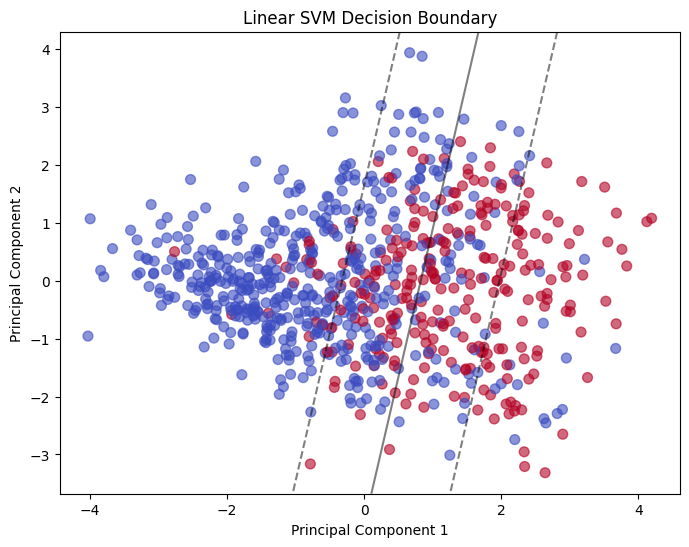

Intercept [-0.71821371]
Coef [[ 0.87105253 -0.17052142]]


In [25]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt


sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"], axis=1)))
y = df["Outcome"]
# Áp dụng PCA để giảm chiều dữ liệu xuống 2 chiều
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_
print("Lượng thông tin được giữ lại của mỗi thành phần:", explained_variance_ratio)
print("Tổng lượng thông tin được giữ lại:", sum(explained_variance_ratio))
#Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình SVM với hàm tuyến tính
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Đánh giá mô hình
accuracy = svm.score(X_test, y_test)
print("Độ chính xác mô hình khi sử dụng PCA:", accuracy)

# Trực quan hóa đường phân chia tuyến tính trên đồ thị
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=50, alpha=0.6)
# Vẽ đường phân chia tuyến tính
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Linear SVM Decision Boundary')
plt.savefig("Mophong_SVM_khi_su_dungPCA.png")
plt.show()
intercept = svm.intercept_
coefficients = svm.coef_
print('Intercept',intercept)
print('Coef',coefficients)

In [26]:

scale= StandardScaler()
X=scale.fit_transform(X)
X=pd.DataFrame(X,columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.564727,0.864625,-0.026238,0.801305,0.626896,0.184034,0.588927,1.445691
1,-1.145487,-1.204727,-0.532122,0.037305,-0.526560,-0.865690,-0.378101,-0.189304
2,1.248813,2.014265,-0.700749,0.419305,0.626896,-1.360560,0.746595,-0.103252
3,-1.145487,-1.073339,-0.532122,-0.726696,-0.672894,-0.640749,-1.022787,-1.049828
4,0.222684,0.503310,-2.724283,0.801305,0.601072,1.608659,2.596563,-0.017199
...,...,...,...,...,...,...,...,...
763,1.932898,-0.679177,0.311017,1.756305,0.807661,0.079061,-1.008772,2.564372
764,-0.803444,0.010607,-0.194866,-0.217362,-0.526560,0.663907,-0.416642,-0.533513
765,0.222684,-0.022240,-0.026238,-0.726696,-0.363010,-0.925674,-0.749497,-0.275356
766,-1.145487,0.141994,-1.038005,0.419305,0.626896,-0.340828,-0.385109,1.187534


In [27]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)


In [28]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [30]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train,model.predict(X_train))
print('Độ chính xác của mô hình đối với tập train là:',accuracy_train)

Độ chính xác của mô hình đối với tập train là: 0.8127035830618893


In [31]:
accuracy_test = accuracy_score(y_test,model.predict(X_test))
print('Độ chính xác của mô hình đối với tập test là:',accuracy_test)

Độ chính xác của mô hình đối với tập test là: 0.8636363636363636


In [32]:
print(classification_report(y_test, y_pred))
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90       107
         1.0       0.75      0.83      0.79        47

    accuracy                           0.86       154
   macro avg       0.84      0.85      0.84       154
weighted avg       0.87      0.86      0.87       154

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86       393
         1.0       0.75      0.71      0.73       221

    accuracy                           0.81       614
   macro avg       0.80      0.79      0.79       614
weighted avg       0.81      0.81      0.81       614



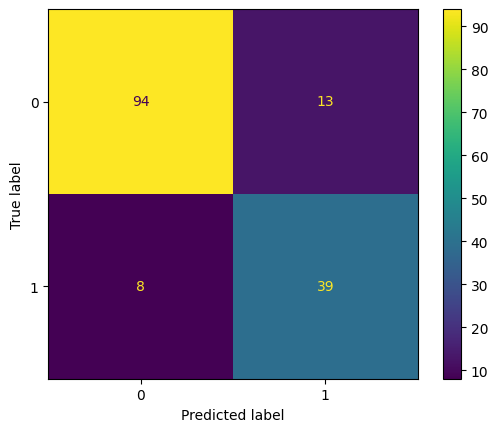

In [33]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.savefig("Ma trận nhầm lẫn")
plt.show()


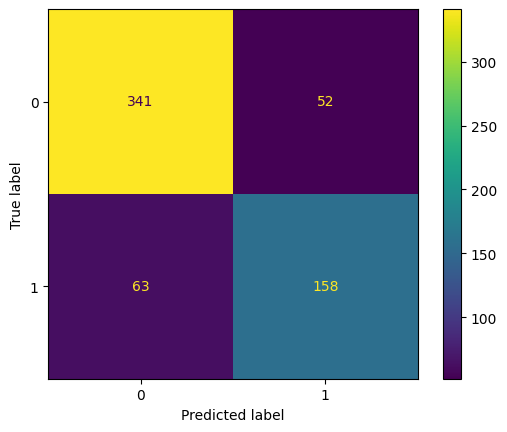

614

In [34]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
y_pred = model.predict(X_train)

confusion_matrix = metrics.confusion_matrix(y_train, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.savefig("Ma trận nhầm lẫn_1")
plt.show()
len(X_train)

In [35]:
C_values = [0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000]
for C in C_values:
    # Khởi tạo mô hình SVM với kernel tuyến tính và tham số C
    model_soft_margin = SVC(kernel='linear',C=C)

    # Huấn luyện mô hình
    model_soft_margin.fit(X_train,y_train)

    # Dự đoán trên tập huấn luyện và tập kiểm tra
    y_pred_train = model_soft_margin.predict(X_train)
    y_pred_test = model_soft_margin.predict(X_test)

    # Tính độ chính xác trên tập huấn luyện và tập kiểm tra
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    # In ra độ chính xác tương ứng với từng giá trị C
    print(f"C = {C}: Train Accuracy = {train_accuracy}, Test Accuracy = {test_accuracy}")




C = 0.0001: Train Accuracy = 0.6400651465798045, Test Accuracy = 0.6948051948051948
C = 0.001: Train Accuracy = 0.6563517915309446, Test Accuracy = 0.7012987012987013
C = 0.01: Train Accuracy = 0.8061889250814332, Test Accuracy = 0.8571428571428571
C = 0.1: Train Accuracy = 0.8127035830618893, Test Accuracy = 0.8701298701298701
C = 1: Train Accuracy = 0.8127035830618893, Test Accuracy = 0.8636363636363636
C = 10: Train Accuracy = 0.8175895765472313, Test Accuracy = 0.8701298701298701
C = 100: Train Accuracy = 0.8143322475570033, Test Accuracy = 0.8636363636363636
C = 1000: Train Accuracy = 0.8127035830618893, Test Accuracy = 0.8636363636363636


C = 0.0001: Train Accuracy = 0.6400651465798045, Test Accuracy = 0.6948051948051948
C = 0.001: Train Accuracy = 0.6563517915309446, Test Accuracy = 0.7012987012987013
C = 0.01: Train Accuracy = 0.8061889250814332, Test Accuracy = 0.8571428571428571
C = 0.1: Train Accuracy = 0.8127035830618893, Test Accuracy = 0.8701298701298701
C = 1: Train Accuracy = 0.8127035830618893, Test Accuracy = 0.8636363636363636
C = 10: Train Accuracy = 0.8175895765472313, Test Accuracy = 0.8701298701298701
C = 100: Train Accuracy = 0.8143322475570033, Test Accuracy = 0.8636363636363636
C = 1000: Train Accuracy = 0.8127035830618893, Test Accuracy = 0.8636363636363636


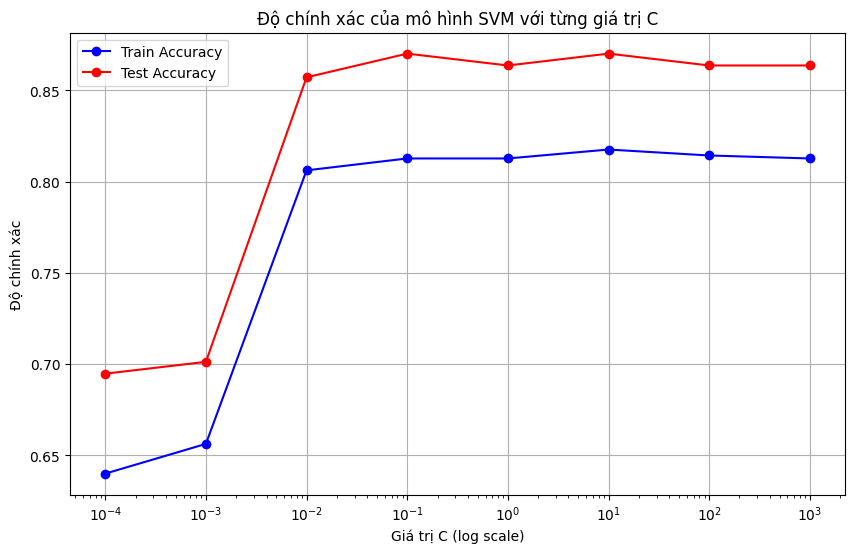

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



# Danh sách để lưu giá trị độ chính xác
train_accuracy_values = []
test_accuracy_values = []

for C in C_values:
    # Khởi tạo mô hình SVM với kernel tuyến tính và tham số C
    model_soft_margin = SVC(kernel='linear', C=C)

    # Huấn luyện mô hình
    model_soft_margin.fit(X_train, y_train)

    # Dự đoán trên tập huấn luyện và tập kiểm tra
    y_pred_train = model_soft_margin.predict(X_train)
    y_pred_test = model_soft_margin.predict(X_test)

    # Tính độ chính xác trên tập huấn luyện và tập kiểm tra
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    # Lưu giá trị độ chính xác vào danh sách
    train_accuracy_values.append(train_accuracy)
    test_accuracy_values.append(test_accuracy)

    # In ra độ chính xác tương ứng với từng giá trị C
    print(f"C = {C}: Train Accuracy = {train_accuracy}, Test Accuracy = {test_accuracy}")

# Vẽ biểu đồ độ chính xác với từng giá trị C
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracy_values, marker='o', linestyle='-', color='b', label='Train Accuracy')
plt.plot(C_values, test_accuracy_values, marker='o', linestyle='-', color='r', label='Test Accuracy')
plt.xscale('log')  # Chuyển trục x sang thang log
plt.xlabel('Giá trị C (log scale)')
plt.ylabel('Độ chính xác')
plt.title('Độ chính xác của mô hình SVM với từng giá trị C')
plt.legend()
plt.grid(True)
plt.savefig("SVM_train_test_accuracy_vs_C.png")  # Lưu hình ảnh biểu đồ
plt.show()  # Hiển thị đồ thị


Lượng thông tin được giữ lại của mỗi thành phần: [0.32036764 0.17455736]
Tổng lượng thông tin được giữ lại: 0.4949250067505834
Độ chính xác mô hình khi sử dụng PCA và C = 0.0001 : 0.6428571428571429


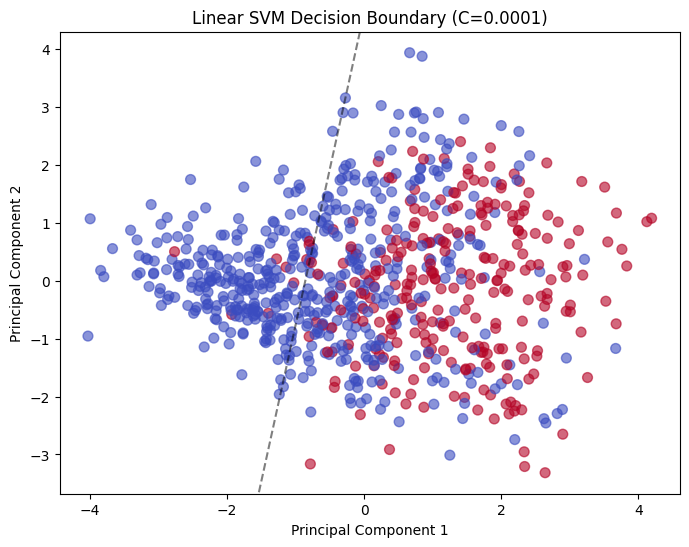

Độ chính xác mô hình khi sử dụng PCA và C = 0.001 : 0.6428571428571429


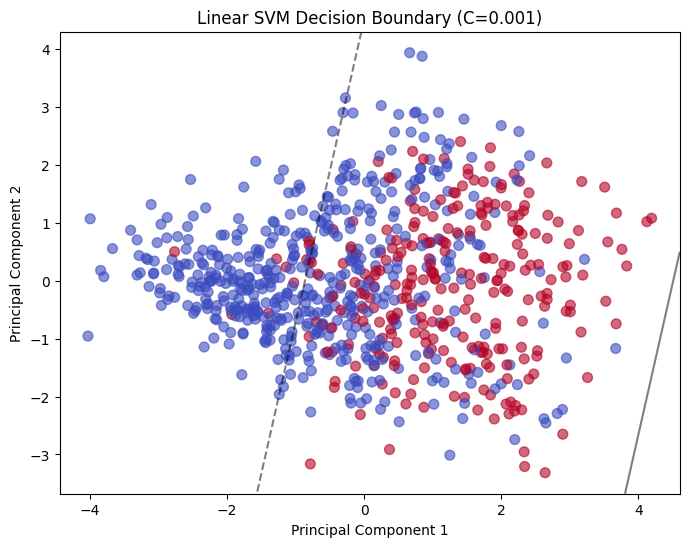

Độ chính xác mô hình khi sử dụng PCA và C = 0.01 : 0.7727272727272727


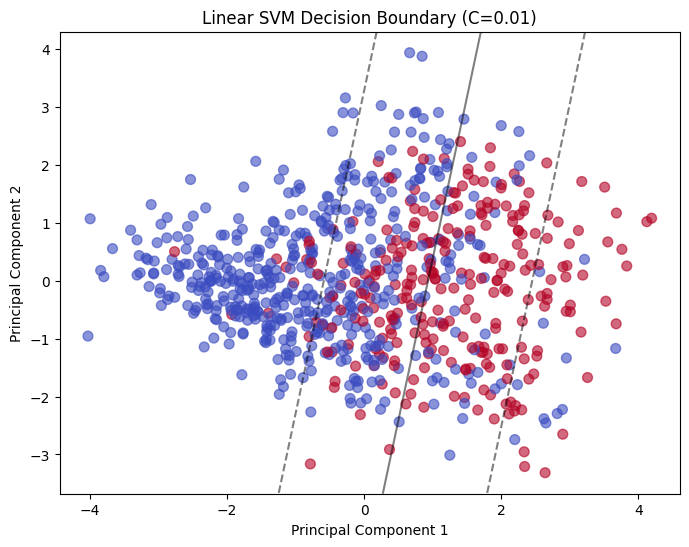

Độ chính xác mô hình khi sử dụng PCA và C = 0.1 : 0.7792207792207793


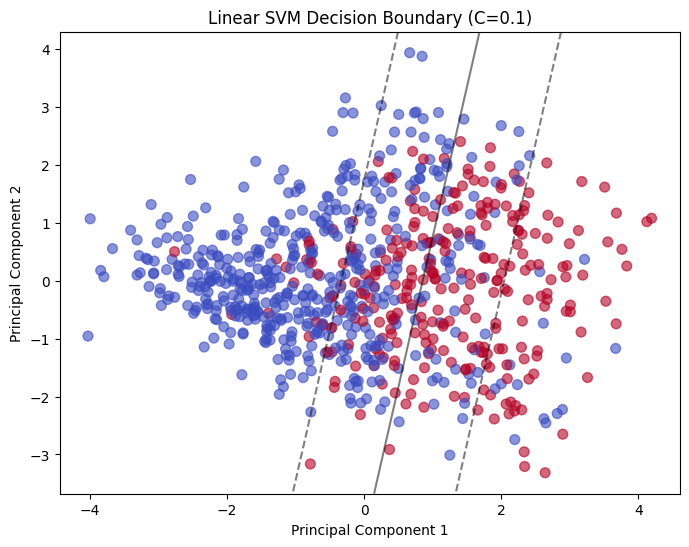

Độ chính xác mô hình khi sử dụng PCA và C = 1 : 0.7857142857142857


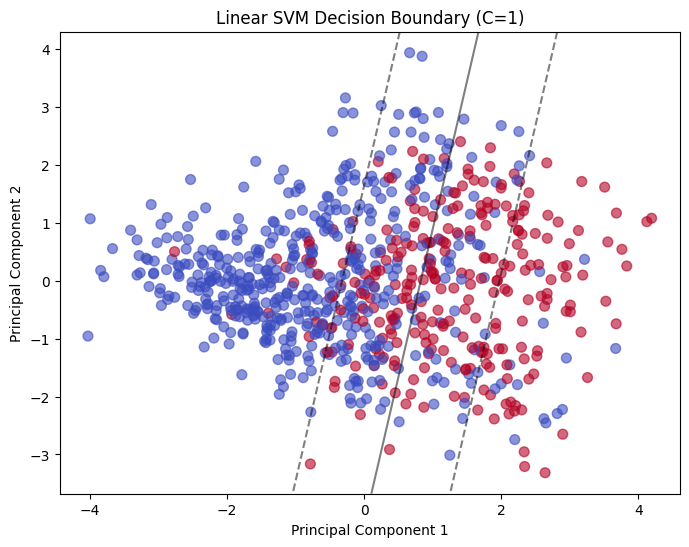

Độ chính xác mô hình khi sử dụng PCA và C = 10 : 0.7857142857142857


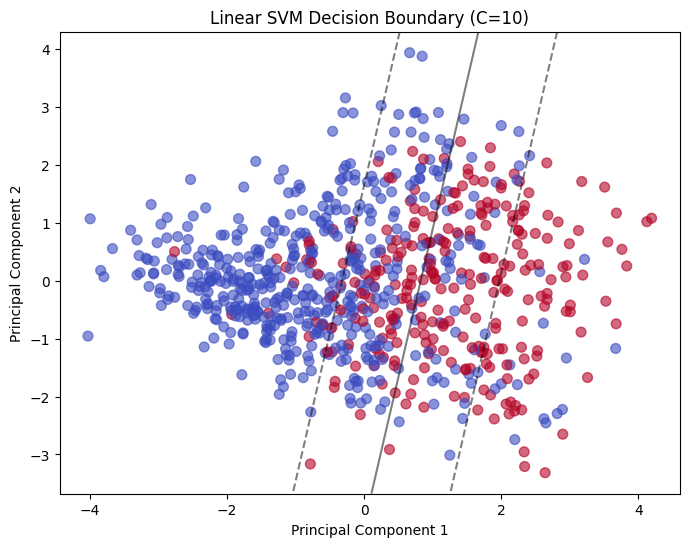

Độ chính xác mô hình khi sử dụng PCA và C = 100 : 0.7857142857142857


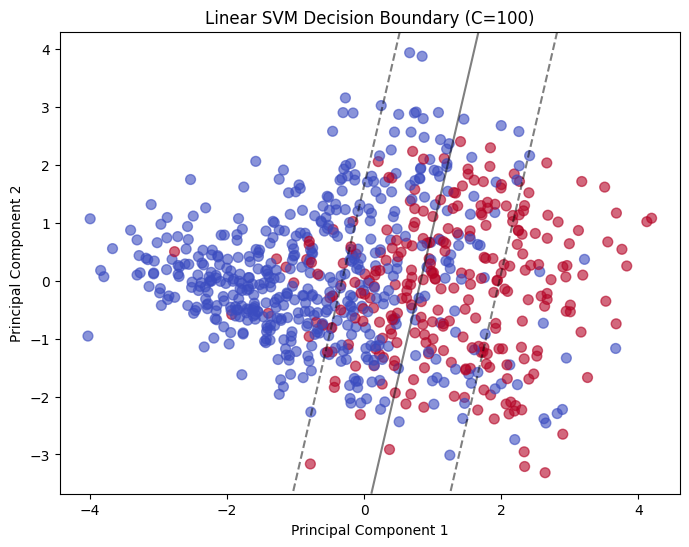

Độ chính xác mô hình khi sử dụng PCA và C = 1000 : 0.7857142857142857


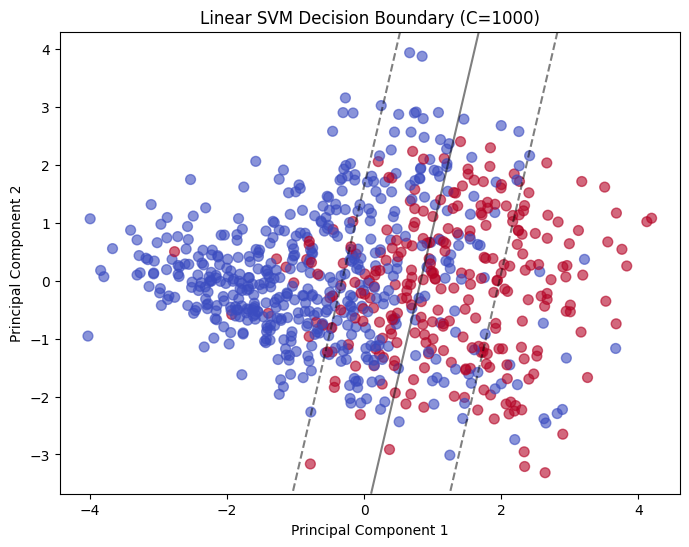

In [37]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

C_values = [0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000]
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"], axis=1)))
y = df["Outcome"]
# Áp dụng PCA để giảm chiều dữ liệu xuống 2 chiều
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_
print("Lượng thông tin được giữ lại của mỗi thành phần:", explained_variance_ratio)
print("Tổng lượng thông tin được giữ lại:", sum(explained_variance_ratio))
for C in C_values:
    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Huấn luyện mô hình SVM với hàm tuyến tính
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)

    # Đánh giá mô hình
    accuracy = svm.score(X_test, y_test)
    print("Độ chính xác mô hình khi sử dụng PCA và C =", C, ":", accuracy)

    # Trực quan hóa đường phân chia tuyến tính trên đồ thị
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=50, alpha=0.6)

    # Vẽ đường phân chia tuyến tính
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Linear SVM Decision Boundary (C=' + str(C) + ')')
    plt.savefig("SVM_PCA_C_" + str(C) + ".png")  # Lưu hình ảnh với tên tương ứng với giá trị C
    plt.show()  # Hiển thị đồ thị

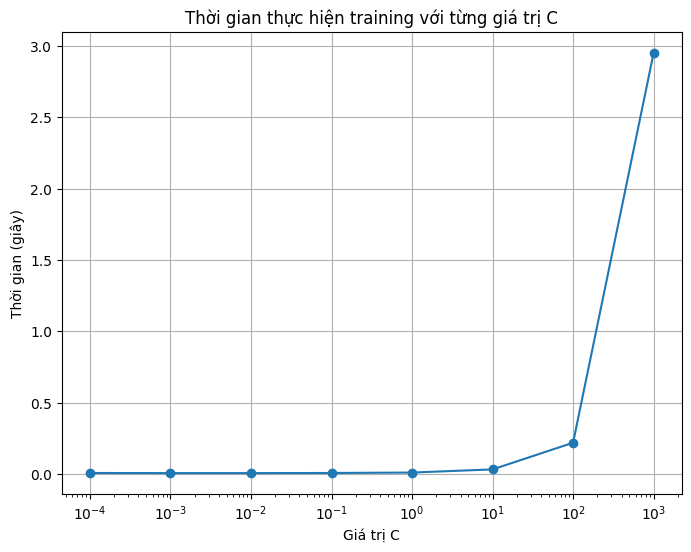

In [38]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split



scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df.drop(["Outcome"], axis=1)))
y = df["Outcome"]


# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Danh sách các giá trị C muốn thử
C_values = [0.0001,0.001,0.01,0.1, 1, 10, 100,1000]

# Danh sách để lưu lại thời gian thực hiện training tương ứng với mỗi giá trị C
training_times = []

# Lặp qua từng giá trị của C
for C in C_values:
    # Khởi tạo mô hình SVM với giá trị C hiện tại
    clf = svm.SVC(kernel='linear', C=C)

    # Ghi lại thời điểm bắt đầu
    start_time = time.time()

    # Huấn luyện mô hình
    clf.fit(X_train, y_train)

    # Ghi lại thời điểm kết thúc
    end_time = time.time()

    # Tính toán thời gian thực hiện
    execution_time = end_time - start_time

    # Thêm thời gian thực hiện vào danh sách
    training_times.append(execution_time)

# Vẽ biểu đồ thời gian thực hiện
plt.figure(figsize=(8, 6))
plt.plot(C_values, training_times, marker='o', linestyle='-')
plt.title('Thời gian thực hiện training với từng giá trị C')
plt.xlabel('Giá trị C')
plt.ylabel('Thời gian (giây)')
plt.xscale('log')
plt.grid(True)
plt.show()
